In [35]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [36]:
# importing dataset
dataset=pd.read_csv('Social_Network_Ads.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [37]:
# spliting dataset into test and training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [38]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [39]:
# train the logistic regression model on the training set
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)  

SVC(random_state=0)

In [40]:
# predicting a new result
print(classifier.predict(ss.transform([[30,87000]])) )

[0]


In [41]:
# predicting test set result
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [42]:
# applying k-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(
    estimator=classifier,
    X=x_train,
    y=y_train,
    cv=10
    )


In [43]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard deviation : 6.57 %


In [44]:
for i in range(0,10):
    print("Accuracy of Fold ",i+1 ," :  {:.2f} %".format(accuracies[i]*100))


Accuracy of Fold  1  :  80.00 %
Accuracy of Fold  2  :  96.67 %
Accuracy of Fold  3  :  80.00 %
Accuracy of Fold  4  :  96.67 %
Accuracy of Fold  5  :  86.67 %
Accuracy of Fold  6  :  86.67 %
Accuracy of Fold  7  :  90.00 %
Accuracy of Fold  8  :  93.33 %
Accuracy of Fold  9  :  100.00 %
Accuracy of Fold  10  :  93.33 %


In [45]:
# Apply grif search to find the best model and the best parameters
from sklearn.model_selection  import GridSearchCV
parameters=[
    {'C':[0.25,0.5,0.75,1], 'kernel':['linear']},
    {'C':[0.25,0.5,0.75,1], 'kernel':['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
]
grid_search=GridSearchCV(
    estimator=classifier,
    param_grid=parameters,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
)
grid_search.fit(x_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_

In [46]:
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best parameters : ",best_parameters)

Best Accuracy: 90.67 %
Best parameters :  {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


In [47]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

# 64 correct predictions who didn't buy product
# 29 correct predictions who did buy product
# 4 incorrect predictions who didn't buy product
# 3 incorrect predictions who did buy product

[[64  4]
 [ 3 29]]


0.93

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


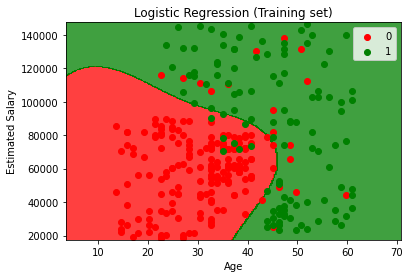

In [48]:
# visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, classifier.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [49]:
# visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, classifier.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()